# PyTorch Computer Vision

## 0. Computer Vision libreries in PyTorch

- `torchvision.datasets`: get dataset and data loading functions for computer vision.
- `torchvision.models`: get pretrained computer vision models that you can leverage for your own problems.
- `torchvision.transforms`: functions for manipulating your vision data (images) to be suitable for use with an ML model .
- `torch.utils.data.Dataset`: Base dataset class for PyTorch.
- `torch.utils.data.DataLoader`: Creates a Python iterable over a dataset

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print("PyTorch version: ",torch.__version__)
print("CUDA Available:", torch.cuda.is_available()) # checks for GPU access with PyTorch
print("PyTorch-Cuda version: ",torch.version.cuda) 
print("Device name: ", torch.cuda.get_device_name(0))

PyTorch version:  2.5.1
CUDA Available: True
PyTorch-Cuda version:  12.4
Device name:  NVIDIA GeForce GTX 1650


In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Getting a dataet
Will be implemented the FashionMNIST from torchvison.dataset

Important: Image data converted to Tensors can differ in the format.
- `NHWC`: [batch_size, height, width, color_channels] - color channels last
- `NCHW`: [batch_size,color_channels, height, width] - color channels first

In [5]:
# SSetting up the training data
train_data = datasets.FashionMNIST(
    root = "data",  # where to download data to?
    train = True,   # get the training dataset?
    download = True, # download the training dataset?
    transform = ToTensor(),
    target_transform = None #how to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# First training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image labels: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image labels: Ankle boot


### 1.2 Visualize the data

Image shape: torch.Size([1, 28, 28])


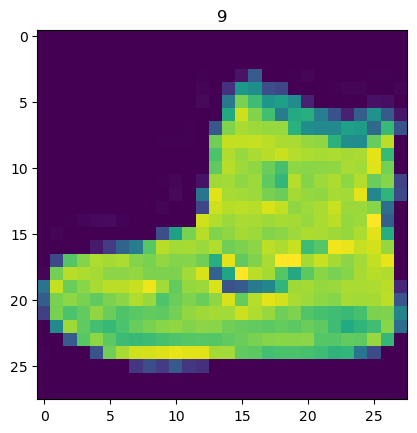

In [13]:
import matplotlib.pyplot as plt # expects only data format: [height, width] without color_channels
image, label, = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

(-0.5, 27.5, 27.5, -0.5)

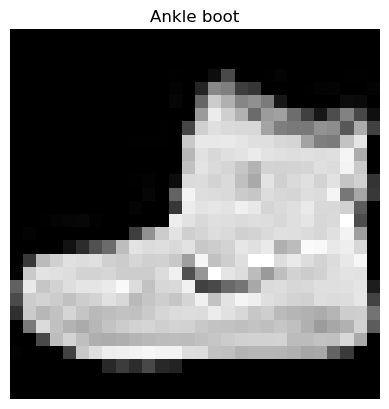

In [14]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

In [15]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range (1, rows*cols+1):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


<Figure size 900x900 with 0 Axes>

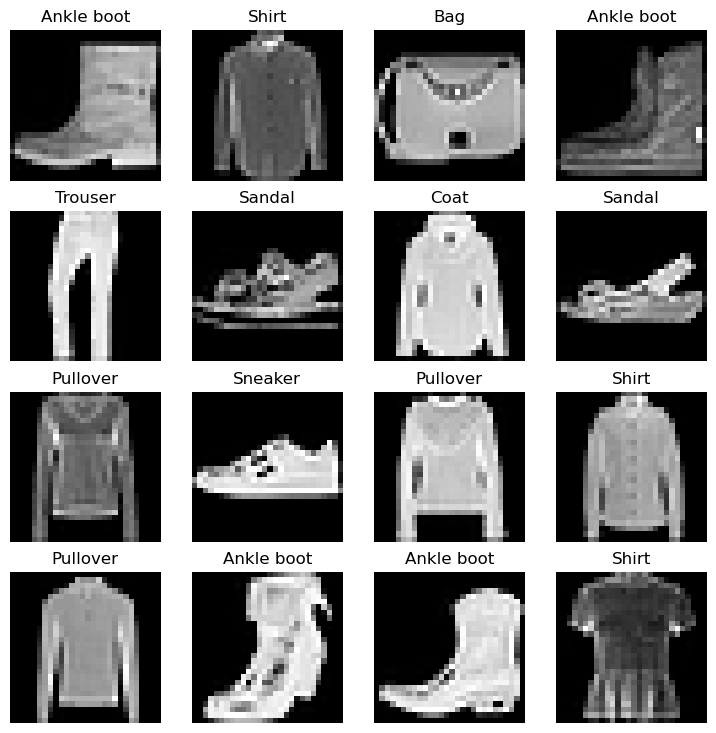

In [16]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range (1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = "gray")
    plt.title(class_names[label])
    plt.axis(False);

In [17]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader
Right now the data is in the form of PyTorch Datasets

DataLoader turns the datasets into a Python iterable. In other words, is good to turn the data into batches (or mini-batches) because:

1. It is more computationallu efficient, as in, the computer hardware may not be able to look (store in memory) at 60000 images in one hit. So the developers break it down to 32 images at a time (batch size of 32).
2. It gives to the Neural Network more chances to update its gradients per epoch.


In [19]:
# Turns datasets into iterable (batches)
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=32,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x77d8c8162250>,
 <torch.utils.data.dataloader.DataLoader at 0x77d8c43f7950>)

In [20]:
# Check what was created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of 32. . . ")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of 32. . . ")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x77d8c8162250>, <torch.utils.data.dataloader.DataLoader object at 0x77d8c43f7950>)
Length of train_dataloader: 1875 batches of 32. . . 
Length of test_dataloader: 313 batches of 32. . . 


In [21]:
# Check what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


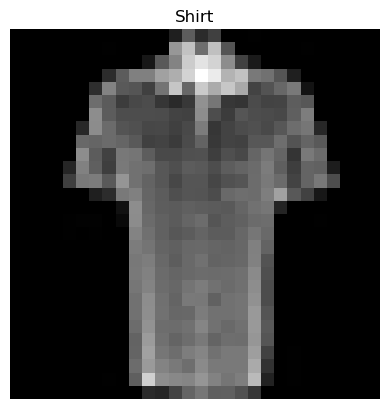

In [22]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


## 3. Model 0: Build a baseline model
When starting to build a series of ML modeling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.
In other words: start simplyb and add complexity when necessary.

In [24]:
# Creating a flatten layer
flatten_model = nn.Flatten() #Flattens a contiguous range of dims into a tensor.

# Get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x) # perfom forward pass

# Print out what's happening
print(f"Shape before flattening: {x.shape}") # -> [color_channels, height, width]
print(f"Shape before flattening: {output.shape}") # -> [color_channels, height*width]

Shape before flattening: torch.Size([1, 28, 28])
Shape before flattening: torch.Size([1, 784])


In [25]:
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000,
          0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000,

In [26]:
output.shape

torch.Size([1, 784])

In [27]:
output.squeeze().shape

torch.Size([784])

In [28]:
class FashionMNISTModel_v0(nn.Module):
    def __init__(self, 
                 input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [29]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModel_v0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape = len(class_names)
).to("cpu")
model_0

FashionMNISTModel_v0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [30]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [31]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluating metrics
- Loss Function: since the model works with multi-class data, the loss function will be `nn.CrossEntropyLoss()`
- Optimizer: the optimizer `torch.optim.SGD()` (stochastic gradient descent).
- Evaluation Metric: since the model works on classification problem, the accuracy may be a good evaluation metric.

In [33]:
import requests
from pathlib import Path
 # Download helper functions from repository
if Path ("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download. . .")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download. . .


In [34]:
# Import accuracy metric from helper_functions
from helper_functions import accuracy_fn 
# could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time experiments
ML is very experimental.

Two of the main things that a ML engineer often want to track are:
- Model's Performance (loss and accuracy values etc)
- How fast it runs

In [36]:
from timeit import default_timer as timer 
def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):
    """Prints difference between start and end time (i.e. how much time the models takes ton run)"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [37]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time,
                end=end_time,
                device="cpu")

Train time on cpu: 0.000 seconds


2.409699999361692e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perfom training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perfom testing steps, calculate the test loss *per batch*.
4. Print out what's happening.


In [39]:
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_cpu = timer()

# Setting epochs
epochs = 3

# Create training and test loop
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n----------")
    ###training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # Forward pass
        y_pred = model_0(X)
        # Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        # Gradient descent
        optimizer.zero_grad()
        # Backpropagation
        loss.backward()
        # Optimizer setp
        optimizer.step()

        # Print what's happening
        if batch % 400 == 0:
            print(f"Look at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

        # Adjust the training loss
        train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Forward pass
            test_pred = model_0(X_test)
            # Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            # Calculate accuracy ~expects true lables and predctions to be on the same format
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # argmax used to compare labels to lables
            # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)
    # Print whats happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}") 
# Calculate training time
train_time_end_cpu = timer()
total_train_time = print_train_time(start=train_time_start_cpu,
                                    end=train_time_end_cpu,
                                    device=str(next(model_0.parameters()).device))

Epoch: 0
----------
Look at 0/60000 samples.
Look at 12800/60000 samples.
Look at 25600/60000 samples.
Look at 38400/60000 samples.
Look at 51200/60000 samples.

Train loss: 0.0002 | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1
----------
Look at 0/60000 samples.
Look at 12800/60000 samples.
Look at 25600/60000 samples.
Look at 38400/60000 samples.
Look at 51200/60000 samples.

Train loss: 0.0003 | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2
----------
Look at 0/60000 samples.
Look at 12800/60000 samples.
Look at 25600/60000 samples.
Look at 38400/60000 samples.
Look at 51200/60000 samples.

Train loss: 0.0002 | Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 25.668 seconds


## 4. Make prediction and get Model results

In [41]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn):
    """Return a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make prediction
            y_pred = model(X)
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            # Scale loss and acc to find the average loss/acc per batch
            loss /torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn):
    """Return a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make prediction
            y_pred = model(X)
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            # Scale loss and acc to find the average loss/acc per batch
            loss /= len(data_loader)
            acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works for models created with class
           "model_loss": loss.item(),
           "model_acc": acc}

In [42]:
# Calculate model 0 restults on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_v0',
 'model_loss': 0.001061143004335463,
 'model_acc': 0.30028917735831345}

## 5. Model 1: Building a better model eith non-linearity



In [44]:
# Create a mixed model (eoth non-linear and linear layers)
class FashionMNISTodel_v1(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [45]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTodel_v1(input_shape=28*28, # flatten's output after 28*28 images goes in 
                               hidden_units= 10,  
                               output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [47]:
from helper_functions import accuracy_fn 
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 6.3 Functionizing training and evaluating/testing loop

Creating a function for:
- training loop
- testing loop

In [49]:
def train_nn(model: torch.nn.Module,
            data_loader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer,
            accuracy_fn,
            device: torch.device = device):
    """Perform training step with model trying to learn on data_loader"""
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device (GPU)
        X, y = X.to(device), y.to(device)
        
        # Forward pass -> outputs the raw logits from the model 
        y_pred = model(X)
        
        # Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # logits -> prediction labels
        
        # Gradient descent
        optimizer.zero_grad()
        
        # Backpropagation
        loss.backward()
        
        # Optimizer setp
        optimizer.step()

    # Adjust the training loss
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [50]:
def test_nn(model: torch.nn.Module,
           data_loader: torch.utils.data.DataLoader,
           loss_fn: torch.nn.Module,
           accuracy_fn,
           device: torch.device = device):
    """Perform testing step with model going over data_loader"""
    test_loss, test_acc = 0, 0

    # Put the model in eval mode
    model_0.eval()
    
    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # 1. Forward pass (outputs raw logits)
            test_pred = model(X)
            # 2. Calculate loss/accuracy (accumulatively)
            test_loss += loss_fn(test_pred, y)  
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # argmax used to compare labels to lables
        # Calculate the test loss/acc average per batch
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        # Print out whats happening
        print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%\n") 

In [51]:
torch.manual_seed(42)

# Measure the time
train_time_start_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using the functionized ones
for epoch in range(epochs):
    print(f"Epochs: {epoch}\n - - - - - - - - - -")
    train_nn(model=model_1,
            data_loader= train_dataloader,
            loss_fn=loss_fn,
            optimizer= optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
    test_nn(model=model_1,
            data_loader= test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_gpu = timer()
total_train_time = print_train_time(start= train_time_start_gpu,
                                   end= train_time_end_gpu,
                                   device=device)

Epochs: 0
 - - - - - - - - - -
Train Loss: 2.30166 | Train acc: 11.31%
Test loss: 2.3021 | Test acc: 10.7528%

Epochs: 1
 - - - - - - - - - -
Train Loss: 2.30166 | Train acc: 11.31%
Test loss: 2.3021 | Test acc: 10.7528%

Epochs: 2
 - - - - - - - - - -
Train Loss: 2.30166 | Train acc: 11.31%
Test loss: 2.3021 | Test acc: 10.7528%

Train time on cuda: 27.821 seconds


### **Note**: Sometimes, depending on the data/hardware the model trains faster on CPU than GPU.

**Reasons:**
1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
2. The hardware used has a better CPU in terms compute capability than the GPU.

References: https://horace.io/brrr_intro.html

In [53]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
              device=device):
    """Return a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Mkae data device agnostic
            X, y = X.to(device), y.to(device)
            # Make prediction
            y_pred = model(X)
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            # Scale loss and acc to find the average loss/acc per batch
            loss /= len(data_loader)
            acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works for models created with class
           "model_loss": loss.item(),
           "model_acc": acc}

In [54]:
# Get model 1 results dictionary
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTodel_v1',
 'model_loss': 0.007440024521201849,
 'model_acc': 0.020095746364844274}

In [55]:
model_0_results

{'model_name': 'FashionMNISTModel_v0',
 'model_loss': 0.001061143004335463,
 'model_acc': 0.30028917735831345}

## Model 2: Bulding a Convolutional Neural Network

CNN's, or ConvNet's, are known for their capabilities to find patterns in visual data extremelly used in images. It seens like a type of image classifier. 

Here is where the "Deep" part of the Learning begins - more layers the ML engineer add to the model deeper the NN goes and more chances it has to find patterns in the data.

Convolution Blocks: combination of multiple layers
A DL Architecture is composed by a lot of ConvBlocks. Deeper the model's get, more blocks it may be comprisse of and more layers those blocks may be comprisse of.

Reference: https://poloclub.github.io/cnn-explainer/

In [57]:
# creating a CNN
class FashionMNISTModel_v2(nn.Module):
    """Model Architecutre that replicates the TinyVGG model from Reference's Website."""
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # 2d because, for now, the model will work with bidimentional data 
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3, # can be a tuple
                     stride=1,
                     padding=1), # these 3 last values are hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # flatten the output of the last layer in a single feature vector
            nn.Linear(in_features=hidden_units*7*7, # little trick to calculate this
                      out_features=output_shape)
        )
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(f"Output hsape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output hsape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        return x

In [58]:
image.shape

torch.Size([1, 28, 28])

In [59]:
torch.manual_seed(42)
model_2 =  FashionMNISTModel_v2(input_shape=1,
                               hidden_units=10,
                               output_shape=len(class_names)).to(device)

### 7.1 Stepping through `nn.Conv2d()`
Reference: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [61]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [62]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=(3,3), # filter to get the right output -> make some mathmatical operation to reshape the input and give a better output
                      stride=1, # it says that the convolution happens 1px at a time
                      padding=1)

# Pass the data to the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`
Reference: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [64]:
# Print original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
# print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Creating a sample nn.MaxPool2 layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # filter: get 4 pxs and return the one with max value 

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 32, 32])


In [65]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=[1, 1, 2, 2])
print(f"Random tensor: {random_tensor}")
print(f"Random tensor Shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax Pool tensor:{max_pool_tensor}")
print(f"\nMax Pool tensor Shape:{max_pool_tensor.shape}")

Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor Shape: torch.Size([1, 1, 2, 2])

Max Pool tensor:tensor([[[[0.3367]]]])

Max Pool tensor Shape:torch.Size([1, 1, 1, 1])


### 7.3 Setup a Loss Function & Optimizer for `model_2`

In [67]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

In [68]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing `model_2` using the Training and Test functions

In [70]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Quantify time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Training and testing models
epochs = 3
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n - - - - - - -")
    
    train_nn(model=model_2,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
    
    test_nn(model=model_2,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn,
           device=device)

train_time_end_model_2 = timer()
total_train_time_model_2= print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device=device)

Epoch: 0
 - - - - - - -
Train Loss: 0.59829 | Train acc: 78.34%
Test loss: 0.4060 | Test acc: 85.2835%

Epoch: 1
 - - - - - - -
Train Loss: 0.36185 | Train acc: 86.95%
Test loss: 0.3544 | Test acc: 87.0008%

Epoch: 2
 - - - - - - -
Train Loss: 0.32742 | Train acc: 88.12%
Test loss: 0.3286 | Test acc: 88.0192%

Train time on cuda: 33.593 seconds


In [71]:
model_2_results = eval_model(
    model=model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_v2',
 'model_loss': 0.0005327690741978586,
 'model_acc': 0.3002892795960338}

In [72]:
model_0_results

{'model_name': 'FashionMNISTModel_v0',
 'model_loss': 0.001061143004335463,
 'model_acc': 0.30028917735831345}

## 8. Comparing the results and training time

In [74]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel_v0,0.001061,0.300289
1,FashionMNISTodel_v1,0.007440,0.020096
2,FashionMNISTModel_v2,0.000533,0.300289


In [75]:
# add training time to results comparison
compare_results["training_time"] = [total_train_time,
                                   total_train_time,
                                   total_train_time]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModel_v0,0.001061,0.300289,27.821092
1,FashionMNISTodel_v1,0.007440,0.020096,27.821092
2,FashionMNISTModel_v2,0.000533,0.300289,27.821092


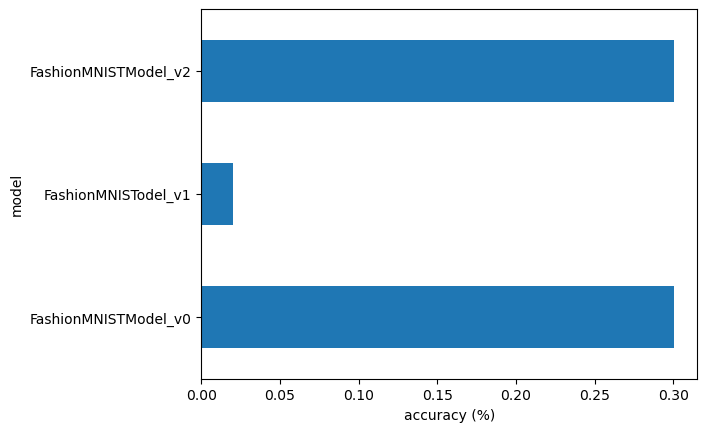

In [76]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [78]:
#  take random samples from test_dataset, make predictions with the model and visualize
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []  
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add batch dimension & pass to the GPU)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            #  Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            #  Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get prediction probabilities off the GPU for futher calculations (matplotlib)
            pred_probs.append(pred_prob.cpu())

#  Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [79]:
import random
random.seed(42)
test_samples = []
test_labels = []
#  Assigning test_data's sample & label to the empyt created lists  
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

#  View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

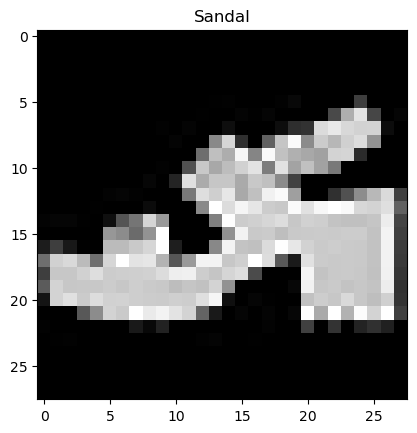

In [80]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [81]:
# Prediction
pred_probs = make_predictions(model=model_2,
                             data=test_samples)

#  View first two prediction probabilities
pred_probs[:2]

tensor([[2.4394e-08, 2.1452e-09, 2.9650e-09, 7.5631e-08, 6.0007e-10, 9.9999e-01,
         5.3621e-08, 3.9949e-07, 1.8826e-06, 7.3054e-06],
        [3.1700e-02, 5.8157e-01, 1.5817e-03, 1.7849e-01, 1.4085e-01, 7.0857e-05,
         6.4547e-02, 1.5014e-04, 1.5980e-04, 8.7274e-04]])

In [82]:
#  Converting pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [83]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

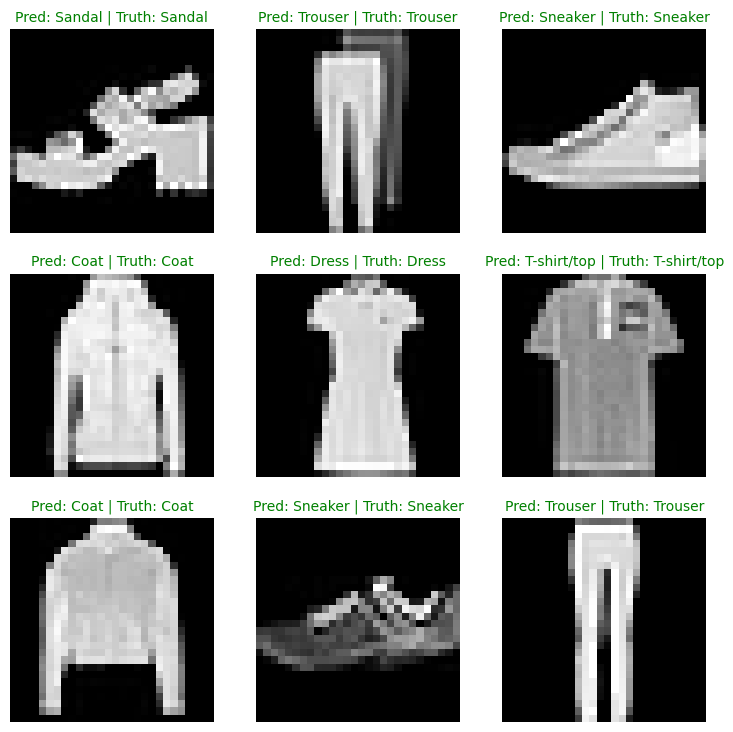

In [84]:
#  Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
    #  Create subplot
    plt.subplot(nrows, ncols, i+1)
    # Plot the target img
    plt.imshow(sample.squeeze(), cmap="gray")
    # Find the prediction
    pred_label = class_names[pred_classes[i]]
    # Truth label
    truth_label = class_names[test_labels[i]]
    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False);

## 10. Making a Confusion Matrix for further prediction evaluation

Enable programmers to evaluating the classification models visually.

1. Make predictions with the model on the test dataset
2. Make a Confusion Matrix `torchmetrics.ConfusionMatrix` -> https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` -> https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
   


In [162]:
from tqdm.auto import tqdm
import mlxtend # https://rasbt.github.io/mlxtend/installation/

# 1. Make predictions with trainded model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions. . ."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions from logits -> predictions probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions. . .:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [164]:
len(y_pred_tensor)

10000

In [176]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)


In [182]:
confmat_tensor

tensor([[626,   5,  39,  84,  10,   1, 229,   0,   6,   0],
        [ 11, 833,   9, 124,  17,   0,   4,   0,   2,   0],
        [ 11,   2, 794,  13, 104,   0,  70,   0,   6,   0],
        [ 20,  13,  26, 858,  40,   0,  34,   1,   6,   2],
        [  4,   3, 129,  53, 704,   0, 102,   0,   5,   0],
        [  7,   5,   4,  14,   0, 807,   4,  59,  80,  20],
        [ 76,   7, 111,  71,  94,   0, 629,   0,  12,   0],
        [  1,   1,   0,   0,   0,  24,   0, 906,  14,  54],
        [  7,   2,  16,  16,  11,   7,  42,   8, 889,   2],
        [  1,   0,   1,   4,   0,  17,   8,  92,  24, 853]])

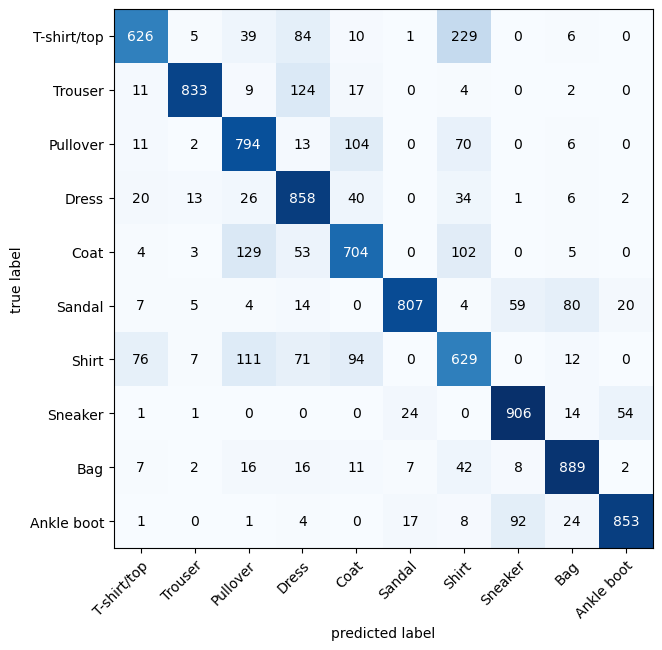

In [180]:
# Plot the Confusion Matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matplotlib dont works with torch.Tensor, so we converto to numpy
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and load best performing model

In [185]:
from pathlib import Path

# Create models directory (if it doesn't already exist)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, 
                 exist_ok=True 
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), 
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [189]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModel_v2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_2.to(device)

/tmp/ipykernel_10870/2839506156.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))


FashionMNISTModel_v2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [193]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_v2',
 'model_loss': 0.0005327690741978586,
 'model_acc': 0.3002892795960338}

In [195]:
model_2_results

{'model_name': 'FashionMNISTModel_v2',
 'model_loss': 0.0005327690741978586,
 'model_acc': 0.3002892795960338}

In [197]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
             torch.tensor(loaded_model_2_results["model_loss"]),
             atol=1e-02)

tensor(True)